In [31]:
import pickle
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from numpy.random import seed

from keras.utils import plot_model

from keras import regularizers

from keras.models import model_from_json
import csv
import json

from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from keras.callbacks import EarlyStopping


# Import Data

X Training set (images) shape: (11829, 28, 28, 1)
X Testset set (images) shape: (5070, 28, 28, 1)
Y Training set (images) shape: (11829, 10)


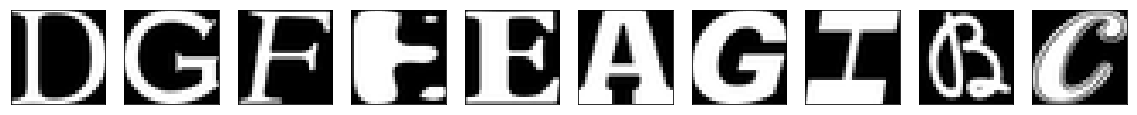

X Training set normalized (images) shape: (11829, 784)
X Testset set normalized (images) shape: (5070, 784)
Y Training set normalized (images) shape: (11829, 10)

Noisy Images


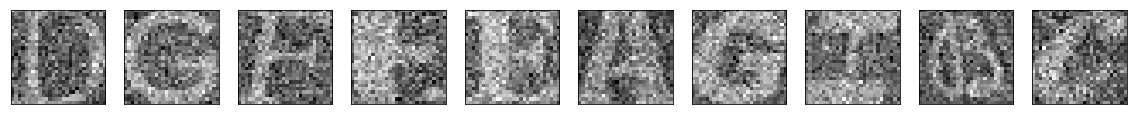


 Columns and Rows:
Number of rows x_train: 784
Number of cols x_train: 11829
Number of rows x_test: 784
Number of cols x_test: 5070
Number of rows y_train: 10
Number of cols y_train: 11829


In [32]:
# Load x_test features from file
# filename = "./x_test.obj"
# with open(filename, 'rb') as file:  
#     x_test = pickle.load(file)
#     file.close()
    
# # Load x_train features from file
# filename = "./x_train.obj"
# with open(filename, 'rb') as file:  
#     x_train = pickle.load(file)
#     file.close()
    
# # Load y_train label from file
# filename = "./y_train.obj"
# with open(filename, 'rb') as file:  
#     y_train = pickle.load(file)
#     file.close()

x_train = pickle.load(open("x_train.obj","rb"))

x_test = pickle.load(open("x_test.obj","rb"))

y_train = pickle.load(open("y_train.obj","rb"))

#See wich data you have
print("X Training set (images) shape: {shape}".format(shape=x_train.shape))
print("X Testset set (images) shape: {shape}".format(shape=x_test.shape))
print("Y Training set (images) shape: {shape}".format(shape=y_train.shape))

#Trasform the y_train to categorical
# y_train = to_categorical(y_train)

#Plot the letters
n = 10  # how many letters we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


y_train = y_train.astype('float32') / 255.
# y_train = y_train.reshape((len(y_train), np.prod(y_train.shape[1:])))

#Create a training and test set with some noise to have a much more robust model
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

y_train_noisy = y_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=y_train.shape)

print("X Training set normalized (images) shape: {shape}".format(shape=x_train.shape))
print("X Testset set normalized (images) shape: {shape}".format(shape=x_test.shape))
print("Y Training set normalized (images) shape: {shape}".format(shape=y_train.shape))

print("\nNoisy Images")

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("\n Columns and Rows:")

#See the right disposition of the predictor
n_rows_x_train = x_train.shape[1]
n_cols_x_train = x_train.shape[0]
print("Number of rows x_train: " + str(n_rows_x_train))
print("Number of cols x_train: " + str(n_cols_x_train))

#See the right disposition of the target array
n_rows_x_test = x_test.shape[1]
n_cols_x_test = x_test.shape[0]
print("Number of rows x_test: " + str(n_rows_x_test))
print("Number of cols x_test: " + str(n_cols_x_test))

#See the right disposition of the target array
n_rows_y_train = y_train.shape[1]
n_cols_y_train = y_train.shape[0]
print("Number of rows y_train: " + str(n_rows_y_train))
print("Number of cols y_train: " + str(n_cols_y_train))

# Create the network

In [110]:
#Use and print the right class weight after the preprocessing
# class_weight = {0:ratio, 1:1-ratio}
# print("Class Weight: " + str(class_weight))

seed(42)

# Start neural network
network = models.Sequential()



earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]


# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(n_rows_x_train,)))


# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=10, activation='sigmoid'))


#Now train autoencoder to reconstruct the input images
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
network.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

# Train neural network
history = network.fit(x_train,        # Features
                        y_train,       # Target vector
                        epochs=50,    # Number of epochs
                        verbose=1,    # Print description after each epoch
                        shuffle=True, #Split the data for validation
                        batch_size=256,
                        callbacks=callbacks_list,
                        validation_split=0.2,
                        validation_data=(X_test,y_test))


#Loss Function = CATEGORICAL CROSS ENTROPY
#Optimizer = ADAM
#Layers = RELU
#Final Output Layer = Softmax

Train on 9463 samples, validate on 2366 samples
Epoch 1/50
9463/9463 [==============================] - 1s 90us/step - loss: 0.0058 - acc: 0.5755 - val_loss: 0.0030 - val_acc: 0.8449
Epoch 2/50
9463/9463 [==============================] - 0s 18us/step - loss: 0.0023 - acc: 0.8619 - val_loss: 0.0020 - val_acc: 0.8711
Epoch 3/50
9463/9463 [==============================] - 0s 17us/step - loss: 0.0018 - acc: 0.8822 - val_loss: 0.0018 - val_acc: 0.8795
Epoch 4/50
9463/9463 [==============================] - 0s 15us/step - loss: 0.0016 - acc: 0.8921 - val_loss: 0.0017 - val_acc: 0.8804
Epoch 5/50
9463/9463 [==============================] - 0s 15us/step - loss: 0.0015 - acc: 0.8988 - val_loss: 0.0016 - val_acc: 0.8850
Epoch 6/50
9463/9463 [==============================] - 0s 18us/step - loss: 0.0015 - acc: 0.9024 - val_loss: 0.0016 - val_acc: 0.8855
Epoch 7/50
9463/9463 [==============================] - 0s 18us/step - loss: 0.0014 - acc: 0.9075 - val_loss: 0.0016 - val_acc: 0.8876
Epoch 8

# Visualize neural network results

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_58 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


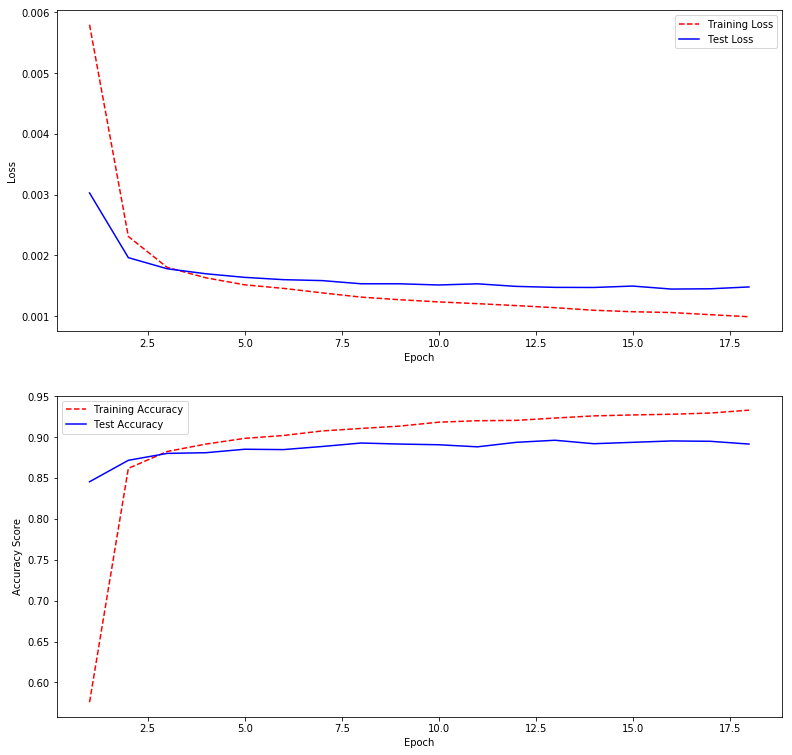

In [38]:


#Visualise the summary of the network
network.summary()

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(13,13))

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
ax2.plot(epoch_count, training_accuracy, 'r--')
ax2.plot(epoch_count, test_accuracy, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])
ax2.set_ylabel('Accuracy Score')
ax1.set_xlabel('Epoch')

plt.xlabel('Epoch')
plt.show();

#Plot the model
# plot_model(network, show_shapes=True, to_file='model.png')

##TODO: Try to use Tensorboard

## Save the model

In [40]:
#Save the model
# serialize model to JSON
model_json = network.to_json()
with open("model-normal.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("model-normal.h5")
print("Saved model to disk")


Saved model to disk


# Make prediction

In [77]:

#Show some statistics about prediction
from keras.models import model_from_json
import csv
    
# load json and create model
json_file = open('model-normal.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model-normal.h5")
print("Loaded model from disk")
 
    
network.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

#Make prediction
y_test = loaded_model.predict(x_test)


print("\nPrediction Completed\n")

print(y_test)

#Names of all of the features
# scoreset_features = list(y_test.columns.values)
# scoreset_features.insert(0, "Id")
# scoreset_features.append("Prediction")
# scoreset_features.append("Score")

letters = ["A","B","C","D","E","F","G","H","I","J"]

result_list = list()

# show the inputs and predicted outputs
for i in range(0,n_rows_x_test):
    result = int(round(np.argmax(y_test[i])))
    result_letter = letters[result]
    
    data_predicted = list()
    data_predicted.insert(0,i)
    data_predicted.append(result)
    data_predicted.append(result_letter)
    
    result_list.append(data_predicted)
    
    #print("X= %s\tPredicted=%s\tScore= %s" % (i,result,result_letter))
    
df_result = pd.DataFrame(result_list,columns=["Id","Result","Letter"])

df_result.to_csv("result-normal.txt",sep="|")
print("\nFile result-normal.txt written\n")




Loaded model from disk

Prediction Completed

[[5.0948274e-06 1.7087636e-04 5.4637172e-07 ... 8.9225077e-06
  9.8797827e-06 9.7990460e-07]
 [1.5374532e-07 1.1148496e-06 4.2194920e-06 ... 6.6982842e-08
  2.0441890e-07 1.1727344e-07]
 [1.2536964e-05 1.6559308e-04 9.1377234e-07 ... 1.1152427e-03
  5.5747319e-07 5.8395924e-09]
 ...
 [3.8406765e-06 2.1924368e-06 2.9696219e-04 ... 2.0426235e-06
  6.3289353e-06 1.5564385e-07]
 [4.2248294e-01 1.0444423e-04 4.5262823e-05 ... 1.3022304e-02
  2.5322770e-03 5.3884723e-04]
 [8.4157676e-09 9.3219654e-09 8.5006135e-08 ... 1.1931568e-09
  3.3088829e-09 8.1307072e-11]]

File result-normal.txt written



# Visualize results

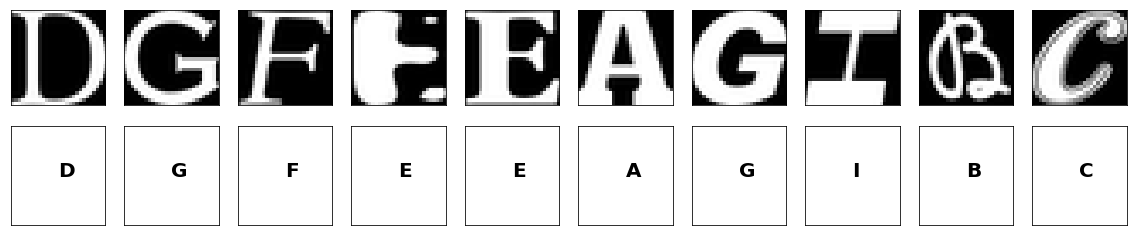

In [108]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5,0.5,str(df_result.iloc[i,2]), wrap=True, fontweight='bold', fontsize=20)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()